02. PyTorch Neural Network Classification


Classification problem: predicting whether/ differentiating one thing from another.
            1. binary classification (predict whether someone has a heart disease or not)

            2. multi-class classififcation (decide whether a photo is of zebra, impala,human)

            3. Multi-label classification (predict what categories should be assigned to given item)

1. Architecture of a classification neural network

    input layer shape(in_features) -> no. of features  -->>

    hiden layers -->>problem sp(mn=1, max=unlimited)

    neurons per hidden layer -->> prblm sp (generallly 10 to 512)

    output layer shape(out_features) -> either class -->> 1 per class fr multiclass

    hidden layer activation -->>ReLU(rectified linear unit)

    output activation  -->>sigmoid fr binary __>>softmax fr multiclass

    loss function -->>binary crossentropy fr binary--->> cross entropy fr multiclass


    optimizer -->>SGD (stochastic gradient descent)


1. Making classification data and getting it ready


using make_circles() method from Scikit-Learn, generate 2 circles with diff colored dots.

In [43]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.datasets import make_circles
#make 1000 samples
n_samples = 1000
#create circles
X, Y = make_circles(n_samples,
                    noise=0.03, #NOISE TO THE DOTS
                    random_state=42) #to get the same values
                    

In [45]:
# view first 5 x and y values
print(f"First 5 X features: \n {X[:5]}")
print(f"First 5 Y labels: \n {Y[:5]}")

First 5 X features: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 Y labels: 
 [1 1 1 1 0]


In [46]:
#make a DataFrame of circle data
import pandas as pd
circles= pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label": Y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [47]:
#checking diff labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

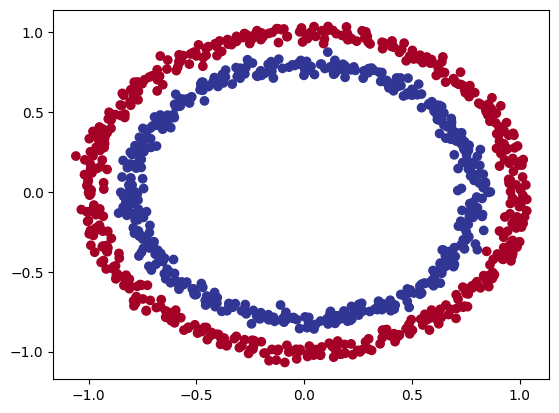

In [48]:
#visualize 
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y =X[:,1],
            c=Y,
            cmap = plt.cm.RdYlBu);

In [49]:
#1.1 Input & output shapes
#check the shapes of features and labels
X.shape, Y.shape


((1000, 2), (1000,))

In [50]:
#first example of features and labels
X_sample = X[0]
Y_sample = Y[0]
print(F"Values for one sample of X: {X_sample} and the same for Y: {Y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for Y: {Y_sample.shape} ")

Values for one sample of X: [0.75424625 0.23148074] and the same for Y: 1
Shapes for one sample of X: (2,) and the same for Y: () 


#1.2 Create tensors from the data and create train and test splits



In [51]:
#turning data into tensors
import torch
X =torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

#view the first 5 samples
X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [52]:
#USING train_test_split from scikit, split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(Y_train),len(X_test)

(800, 200, 800, 200)

2. Building a model

1.set up device agnostic Code

2. construct model by subclassing nn.Module

3.define loss funct and optiizer

4. create a training loop

In [53]:
import torch
from torch import nn
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Create a model class that:
        1. subclasses nn.Module
        2. creates nn.linear layers in the constructor tohandle input and output shapes of x&y
        3.  define a forward() method
        4.  instantiates the model class and sends it to the target device(cpu or gpu)


In [54]:
# subclass nn.Module class
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 nn.linear layers to handle x&y input&output shapes
        self.layer_1 = nn.Linear(in_features = 2, out_features=5)
        self.layer_2 = nn.Linear(in_features =5, out_features =1)
    #forward() method
    def forward (self,X):
        #return output of layer_2 a single feature the same shape as Y
        return self.layer_2(self.layer_1(X)) #go thru layer_1 first then the output of layer_1 goes thru layer_2
    
#create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0 

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [55]:
#making predictions on the model
untrained_preds = model_0(X_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"length of test sample: {len(Y_test)}, Shape: {Y_test.shape}")
print(f"\n First 10 predictions: \n {untrained_preds[:10]}")
print(f"\n First 10test labels: \n {Y_test[:10]}")

length of predictions: 200, Shape: torch.Size([200, 1])
length of test sample: 200, Shape: torch.Size([200])

 First 10 predictions: 
 tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)

 First 10test labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [56]:
#2.1 setting up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [57]:
#calculate accuracy (a classification metric)
def accuracy_fn(Y_true, Y_pred):
    correct = torch.eq(Y_true, Y_pred).sum().item()#torch.eq calculates where two tensors are equal
    acc = (correct / len(Y_pred))*100
    return acc

3. Train Model

In [58]:
#view first 5 outputs of the forward pass on the test data
Y_logits = model_0(X_test.to(device))[:5]
Y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], grad_fn=<SliceBackward0>)

In [59]:
#use sigmoid on model logits
Y_pred_probs = torch.sigmoid(Y_logits)
Y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], grad_fn=<SigmoidBackward0>)

In [60]:
#find predicted labels/round the prediction probabilities
Y_preds = torch.round(Y_pred_probs)

Y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#checking for equality
print(torch.eq(Y_preds.squeeze(),Y_pred_labels.squeeze()))
#getting rid of extra dimension
Y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [61]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [62]:
#3.2 Building training and testing loops
torch.manual_seed(42)
epochs= 100
#build training and evaluation loop
for epoch in range(epochs):
    model_0.train()

    #1.forward pass
    y_logits = model_0(X_train).squeeze() #squeeze to remove extra '1' dimensins
    Y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> predprobs ->pred labels
    #2.calc loss/accuracy
    loss = loss_fn(y_logits,Y_train)
    acc = accuracy_fn(Y_true=Y_train,Y_pred=Y_pred)
    #3.optimize zero grad
    optimizer.zero_grad()
    #4.loss backwards
    loss.backward()
    #5. step optimizer
    optimizer.step()
    
    
    #Testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #calc loss/accuracy
        test_loss = accuracy_fn(Y_true=Y_test, Y_pred=test_pred)
        test_acc = accuracy_fn(Y_true=Y_test, Y_pred=test_pred)
    #print out chenye inahappen every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} |Loss:{loss:.5f}, Accuracy:{acc:.2f}% | Test loss: {test_loss:.5f}. Test acc: {test_acc:.2f}%")

Epoch:0 |Loss:0.69569, Accuracy:50.00% | Test loss: 50.00000. Test acc: 50.00%
Epoch:10 |Loss:0.69403, Accuracy:50.00% | Test loss: 50.00000. Test acc: 50.00%
Epoch:20 |Loss:0.69343, Accuracy:46.00% | Test loss: 48.50000. Test acc: 48.50%
Epoch:30 |Loss:0.69321, Accuracy:49.00% | Test loss: 47.50000. Test acc: 47.50%
Epoch:40 |Loss:0.69312, Accuracy:49.50% | Test loss: 46.50000. Test acc: 46.50%
Epoch:50 |Loss:0.69308, Accuracy:50.38% | Test loss: 46.50000. Test acc: 46.50%
Epoch:60 |Loss:0.69306, Accuracy:50.50% | Test loss: 46.50000. Test acc: 46.50%
Epoch:70 |Loss:0.69305, Accuracy:50.50% | Test loss: 46.50000. Test acc: 46.50%
Epoch:80 |Loss:0.69304, Accuracy:50.75% | Test loss: 46.50000. Test acc: 46.50%
Epoch:90 |Loss:0.69303, Accuracy:50.38% | Test loss: 46.50000. Test acc: 46.50%


4.Making Predictions and evaluate the model

In [63]:
import requests
from pathlib import Path
#downloading helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping download")
else:
    print("Downloading helper_functions.py")
    request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open ("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exist, skipping download


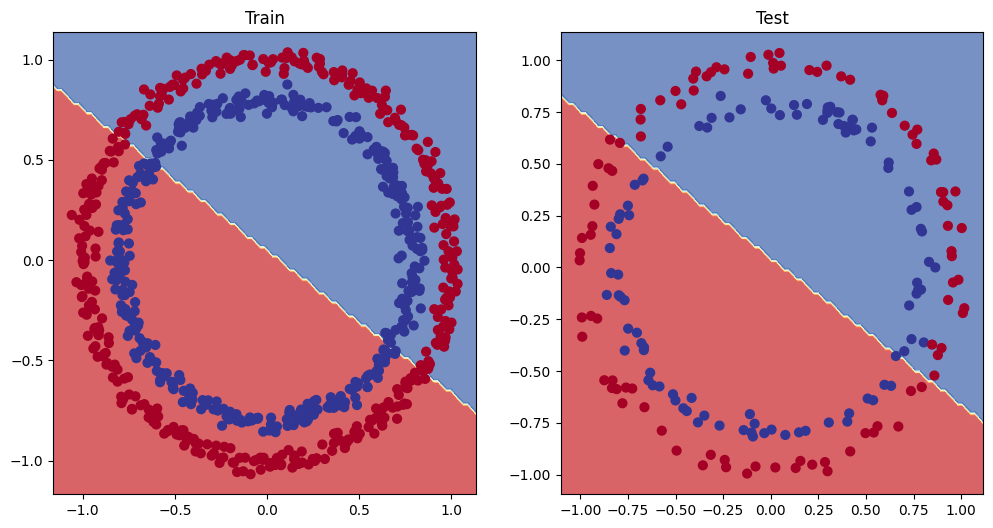

In [64]:
#plot decions boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, Y_test)

from above, model is trying to split data using a straight line, which is underfitting since our data is circular

5. Improving a model (model approach)
.   .   .

6. Non-linearity


(give the model capacity to draw non-linear lines)

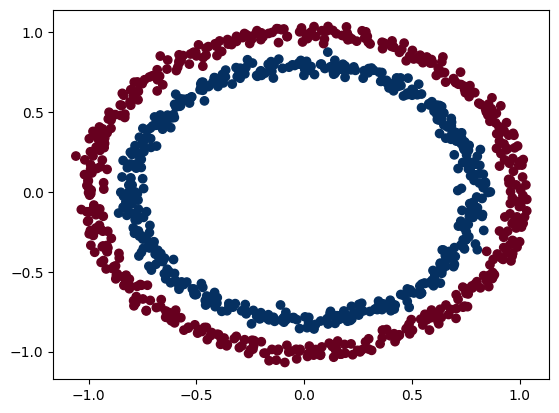

In [65]:
#6.1 Recreating non-linear data (re&blue circles)
#to start off fresh, recreate the data
#make&plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =1000
X, Y = make_circles(n_samples=1000, noise = 0.03, random_state=42)
plt.scatter(X[:,0],X[:,1], c = Y, cmap=plt.cm.RdBu);



In [66]:
#converting into tensors and splitting into  train and test sets
import torch
from sklearn.model_selection import train_test_split
#numpy data into tensors
X= torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)
#splitting
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train[:5], Y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [67]:
#Building a model with non-linearity
#build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() 
    
    def forward(self,X):
        #interface the ReLU activation functionbetween layers
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))
    
model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [68]:
#loss and optimizer function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [69]:
#Training a model with non-linearity
#fitting the model
torch.manual_seed(42)
epochs = 1000
for epoch in range (epochs):
    #forward pass
    y_logits= model_3(X_train).squeeze()
    Y_pred = torch.round(torch.sigmoid(y_logits)) #logits ->> prediction probs ->> prediction labels
    #calc loss and accuracy
    loss=loss_fn(y_logits,Y_train) #BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(Y_true=Y_train, Y_pred=Y_pred)
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()


    ##Testing
    model_3.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #calculate loss and accuracy
        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(Y_true=Y_test, Y_pred=test_pred)
    #print progress
    if epoch % 100 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


In [70]:
#6.4 Evaluating the non-linear trained model
#making predictions
model_3.eval()
with torch.inference_mode():
    Y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
Y_preds[:10], Y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

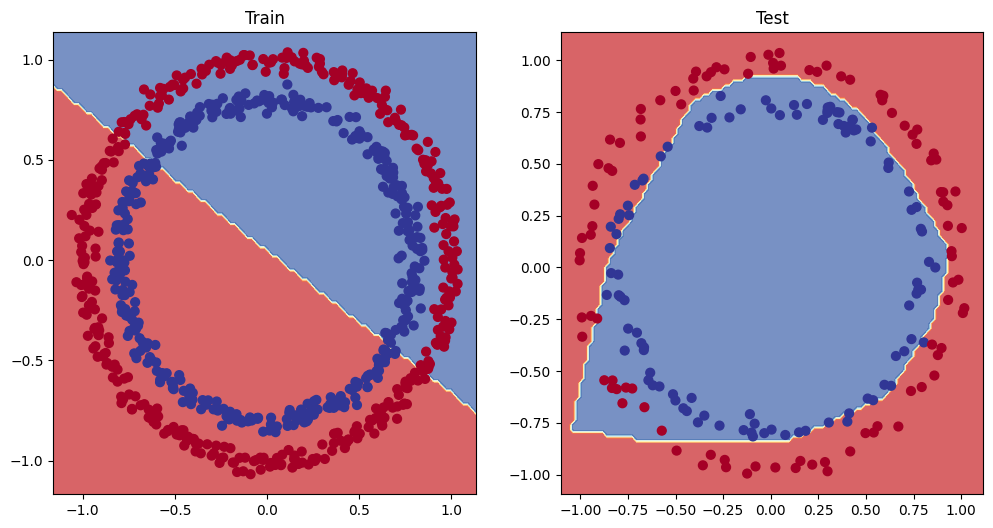

In [71]:
#PLOT DECISION BOUNDARIES FRO TRAINING AND TESTING SETS
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train) #model_1 == no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, Y_test) #model_3 == non-linearity

8. Putting all together: Building a multi-class PyTorch model

8.1 ##Creating multi-class classification data

1. create multi-class data with make_blobs()
2. turn the data into tensors (make_blobs()'s default is NumPy arrays)
3. split data into training and test sets using train_test_split()
4. visualize the data


tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


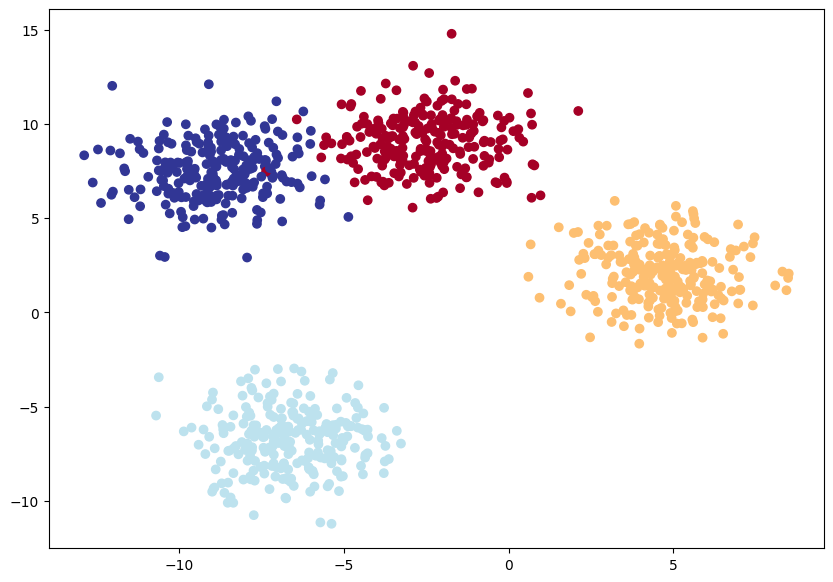

In [72]:
#importing dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1.create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
#X_blob, Y_blob = make_blobs(n_samples = 1000,
                            
n_features = NUM_FEATURES, #X features
centers = NUM_CLASSES, #y labels
cluster_std = 1.5, #
random_state = RANDOM_SEED)

#2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
#Y_blob = torch.from_numpy(Y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

#3. split into train and test sets
#X_blob_train, X_blob_test, Y_blob_train, Y_blob_test = train_test_split(X_blob,Y_blob, test_size=0.2, random_state=RANDOM_SEED)
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED
                                                                        )
#4. plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);
#plt.scatter(X_blob[:,0], X_blob[:,1],c=Y_blob, cmap=plt.cm.RdYlBu);





8.2  ##Building a multi-class classification model in PyTorch


        #create a sub-class of nn.Module that takes in 3 hyperparameters

        . input_features 
        . output_features
        . hidden_units -- no. of hidden neurons you'd like each hidden layer to use

In [73]:
#device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [74]:
from torch import nn
#Build model
class BlobModel(nn.Module):
    def __init__(self,input_features, output_features, hidden_units):
        """Initializes all required hyperparameters for a multi-class classification model. """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features),
            )
    def forward(self,x):
        return self.linear_layer_stack(x)
    
#create an instance of BlobModel
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features= NUM_CLASSES,
                    hidden_units=8)
model_4
        

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

8.3 ## Creating a loss function and an optimizer for a multi-class PyTorch model

nn.CrossEntryLoss() method since its multi-class classification problem

In [75]:
#loss&optimizer functions
loss_fn = nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(model_4.parameters(), lr =0.1)

8.4 ##Obtaining prediction probabilities

In [76]:
#single forward pass
#model_4(X_blob_train.to(device))[:5]
model_4(X_blob_train)[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [77]:
#no. ofelements in a single prediction sample
model_4(X_blob_train)[0].shape, NUM_CLASSES


(torch.Size([4]), 4)

In [78]:
#make prediction logits with model
y_logits = model_4(X_blob_test.to(device))
#Y_logits = model_4(X_blob_test)

# figure out exactly which label is giving the sample 
# go from logits --> prediction probs-->prediction labels
#perform softmax calc on logits across dimension 1 to get prediction probabilities
#softmax calculates the probability of each prediction class being the actual predicted class compared to all other possible classes
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])
#Y_pred_probs = torch.softmax(Y_logits, dim=1)
#print(Y_logits[:5])
#print(Y_pred_probs[:5])


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)


In [79]:
#sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])


tensor(1., grad_fn=<SumBackward0>)

In [80]:
#which class model think is most likely at the index 0 sample
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))
#print(Y_pred_probs[0])
#print(torch.argmax(Y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], grad_fn=<SelectBackward0>)
tensor(3)


8.5 ## Creating a training and testing loop 

In [81]:
#fit the model
torch.manual_seed(42)
epochs = 100
##
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#X_blob_train,Y_blob_train = X_blob_train, Y_blob_train
#X_blob_test, Y_blob_test = X_blob_test, Y_blob_test
##
for epoch in range(epochs):
    ##Training
    model_4.train()

    #1. forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    
    #Y_logits = model_4(X_blob_train) #model outputs raw logits
    #Y_pred = torch.softmax(Y_logits, dim =1).argmax(dim=1) # go from logits->prediction probs ->prediction labels
    #print(Y_logits)
    # 2. calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    
    
    #loss = loss_fn(Y_logits, Y_blob_train)
    #acc = accuracy_fn(Y_true = Y_blob_train, Y_pred = Y_pred)
    #acc = accuracy_fn(Y_true=Y_blob_train,
    #                  y_pred=Y_pred)

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backwards
    loss.backward()

    #5. optimizer step
    optimizer.step()

    ##Testing
    model_4.eval()
    with torch.inference_mode():
        #1. forward pass
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)


        #test_logits= model_4(X_blob_test)
        #test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        #2 calc the test loss and the acuracy
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test, y_pred=test_pred)
        
        #test_loss = loss_fn(test_logits, Y_blob_test)
        #test_acc = accuracy_fn(Y_true=Y_blob_test, Y_pred=test_pred)
    #show what's happening
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc:{test_acc:.2f}%")
        



TypeError: accuracy_fn() got an unexpected keyword argument 'y_true'